# Linear Regression Basics

## Overview

**Linear Regression** is one of the most fundamental and widely used machine learning algorithms. It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.

## Mathematical Foundation

**Simple Linear Regression** (1 feature):
\[
y = \beta_0 + \beta_1 x + \epsilon
\]

**Multiple Linear Regression** (multiple features):
\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
\]

**Matrix Form**:
\[
y = X\beta + \epsilon
\]

**Optimization (Ordinary Least Squares)**:
\[
\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \min_{\beta} ||y - X\beta||^2
\]

**Closed-form Solution**:
\[
\hat{\beta} = (X^T X)^{-1} X^T y
\]

## Topics Covered

1. Simple Linear Regression (1 feature)
2. Multiple Linear Regression (many features)
3. Polynomial Features
4. Model Evaluation (R², MSE, MAE)
5. Assumptions and Diagnostics
6. Real-world Datasets (California Housing, Diabetes)

## Setup and Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import (
    make_regression,
    load_diabetes,
    fetch_california_housing
)

np.random.seed(42)
sns.set_style('whitegrid')
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Simple Linear Regression (1 Feature)

### 1.1 Synthetic Data Example

In [2]:
# Generate simple synthetic data
np.random.seed(42)
X_simple = 2 * np.random.rand(100, 1)
y_simple = 4 + 3 * X_simple[:, 0] + np.random.randn(100)

print("Simple Linear Regression Example")
print("="*70)
print(f"True relationship: y = 4 + 3*x + noise")
print(f"Data shape: X={X_simple.shape}, y={y_simple.shape}")

# Create and train model
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# Get parameters
intercept = model_simple.intercept_
coefficient = model_simple.coef_[0]

print(f"\nLearned parameters:")
print(f"  Intercept (β₀): {intercept:.4f}  (true: 4.0)")
print(f"  Coefficient (β₁): {coefficient:.4f}  (true: 3.0)")
print(f"\nLearned equation: y = {intercept:.4f} + {coefficient:.4f}*x")

# Make predictions
y_pred_simple = model_simple.predict(X_simple)

# Evaluate
r2 = r2_score(y_simple, y_pred_simple)
mse = mean_squared_error(y_simple, y_pred_simple)
mae = mean_absolute_error(y_simple, y_pred_simple)

print(f"\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")

Simple Linear Regression Example
True relationship: y = 4 + 3*x + noise
Data shape: X=(100, 1), y=(100,)

Learned parameters:
  Intercept (β₀): 4.2151  (true: 4.0)
  Coefficient (β₁): 2.7701  (true: 3.0)

Learned equation: y = 4.2151 + 2.7701*x

Model Performance:
  R² Score: 0.7693
  MSE: 0.8066
  MAE: 0.7010


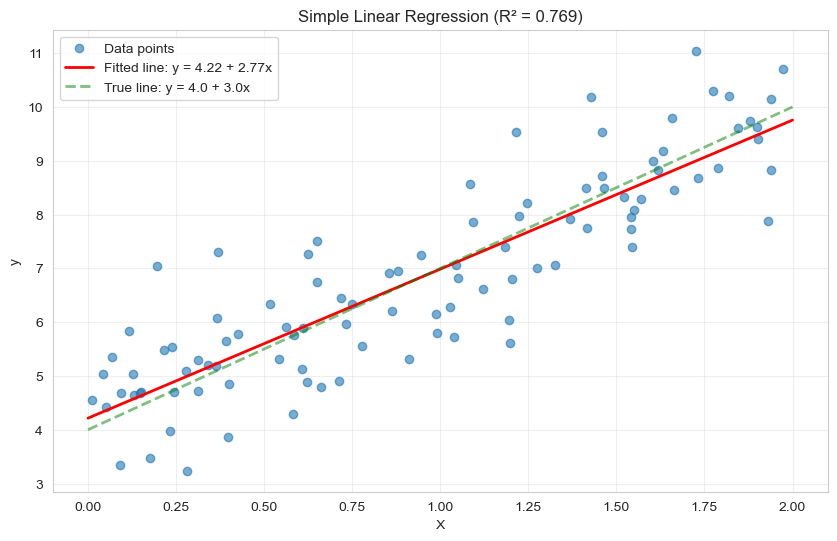

In [3]:
# Visualize
plt.figure(figsize=(10, 6))

# Scatter plot of data
plt.scatter(X_simple, y_simple, alpha=0.6, label='Data points')

# Regression line
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = model_simple.predict(X_line)
plt.plot(X_line, y_line, 'r-', linewidth=2, label=f'Fitted line: y = {intercept:.2f} + {coefficient:.2f}x')

# True line
y_true = 4 + 3 * X_line
plt.plot(X_line, y_true, 'g--', linewidth=2, alpha=0.5, label='True line: y = 4.0 + 3.0x')

plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Simple Linear Regression (R² = {r2:.3f})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 1.2 Manual Implementation (Understanding the Math)

In [4]:
# Manual computation using Normal Equation: β = (X^T X)^(-1) X^T y
X_with_bias = np.c_[np.ones((X_simple.shape[0], 1)), X_simple]

# Normal equation
beta_manual = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y_simple

print("Manual Implementation (Normal Equation)")
print("="*70)
print(f"\nManually computed parameters:")
print(f"  β₀ (intercept): {beta_manual[0]:.4f}")
print(f"  β₁ (coefficient): {beta_manual[1]:.4f}")

print(f"\nSklearn parameters:")
print(f"  β₀ (intercept): {intercept:.4f}")
print(f"  β₁ (coefficient): {coefficient:.4f}")

print(f"\n✓ Manual and sklearn results match!")

# Make predictions manually
y_pred_manual = X_with_bias @ beta_manual

# Verify they match
assert np.allclose(y_pred_simple, y_pred_manual), "Predictions don't match!"
print("✓ Predictions also match!")

Manual Implementation (Normal Equation)

Manually computed parameters:
  β₀ (intercept): 4.2151
  β₁ (coefficient): 2.7701

Sklearn parameters:
  β₀ (intercept): 4.2151
  β₁ (coefficient): 2.7701

✓ Manual and sklearn results match!
✓ Predictions also match!


## 2. Multiple Linear Regression

### 2.1 Synthetic Data with Multiple Features

In [5]:
# Generate multiple regression data
X_multi, y_multi = make_regression(
    n_samples=200,
    n_features=5,
    n_informative=3,
    noise=10,
    random_state=42
)

print("Multiple Linear Regression Example")
print("="*70)
print(f"Data shape: X={X_multi.shape}, y={y_multi.shape}")
print(f"Features: {X_multi.shape[1]}")
print(f"Informative features: 3")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Multiple Linear Regression Example
Data shape: X=(200, 5), y=(200,)
Features: 5
Informative features: 3

Train set: 160 samples
Test set: 40 samples


In [6]:
# Train model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Get parameters
print("\nModel Parameters:")
print(f"  Intercept: {model_multi.intercept_:.4f}")
print(f"  Coefficients:")
for i, coef in enumerate(model_multi.coef_):
    print(f"    Feature {i}: {coef:.4f}")

# Predictions
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nPerformance:")
print(f"  Train R²: {train_r2:.4f}")
print(f"  Test R²:  {test_r2:.4f}")
print(f"  Train MSE: {train_mse:.2f}")
print(f"  Test MSE:  {test_mse:.2f}")


Model Parameters:
  Intercept: 0.9732
  Coefficients:
    Feature 0: -0.3247
    Feature 1: 11.0145
    Feature 2: 64.8846
    Feature 3: 17.9451
    Feature 4: -0.7809

Performance:
  Train R²: 0.9774
  Test R²:  0.9793
  Train MSE: 102.34
  Test MSE:  85.06


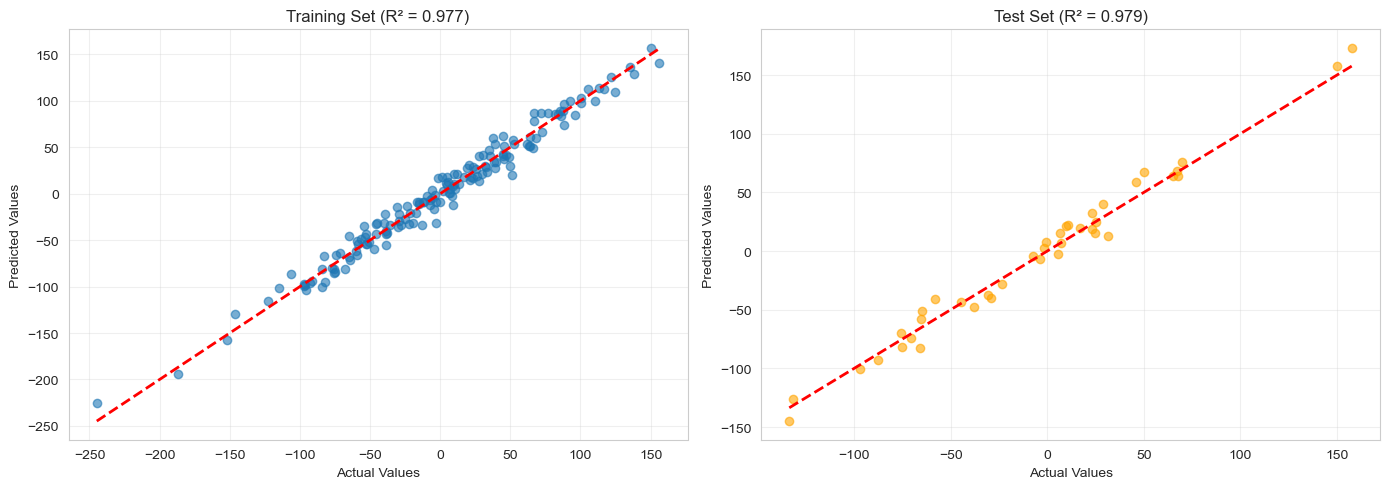

In [7]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Training Set (R² = {train_r2:.3f})')
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Test Set (R² = {test_r2:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Feature Importance (Coefficient Magnitude)

Feature Importance (by coefficient magnitude):
  Feature  Coefficient  Abs_Coefficient
Feature 2    64.884640        64.884640
Feature 3    17.945102        17.945102
Feature 1    11.014517        11.014517
Feature 4    -0.780854         0.780854
Feature 0    -0.324746         0.324746


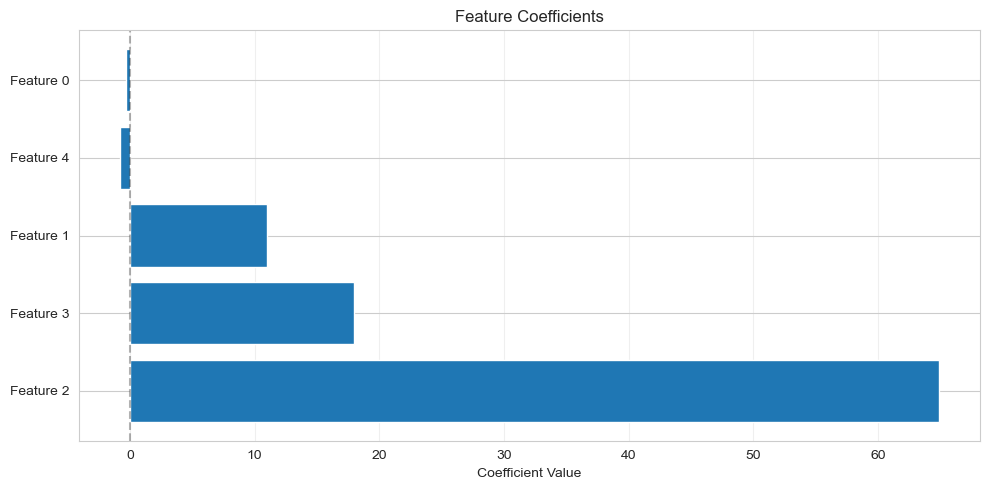


💡 Note: Coefficient magnitude indicates feature importance
   ONLY when features are on the same scale!
   Otherwise, standardize features first.


In [8]:
# Visualize coefficient magnitudes
feature_names = [f'Feature {i}' for i in range(X_multi.shape[1])]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_multi.coef_,
    'Abs_Coefficient': np.abs(model_multi.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(coef_df.to_string(index=False))

# Plot
plt.figure(figsize=(10, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Note: Coefficient magnitude indicates feature importance")
print("   ONLY when features are on the same scale!")
print("   Otherwise, standardize features first.")

## 3. Real Dataset: Diabetes Progression

### 3.1 Load and Explore Data

In [9]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("Diabetes Dataset")
print("="*70)
print(f"Description: {diabetes.DESCR[:200]}...")
print(f"\nShape: {X_diabetes.shape}")
print(f"Features: {len(diabetes.feature_names)}")
print(f"Feature names: {diabetes.feature_names}")
print(f"\nTarget (disease progression):")
print(f"  Range: [{y_diabetes.min():.0f}, {y_diabetes.max():.0f}]")
print(f"  Mean: {y_diabetes.mean():.2f}")
print(f"  Std: {y_diabetes.std():.2f}")

# Create DataFrame for easier analysis
df_diabetes = pd.DataFrame(X_diabetes, columns=diabetes.feature_names)
df_diabetes['target'] = y_diabetes

print("\nFirst few rows:")
print(df_diabetes.head())

Diabetes Dataset
Description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 ...

Shape: (442, 10)
Features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Target (disease progression):
  Range: [25, 346]
  Mean: 152.13
  Std: 77.01

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.0

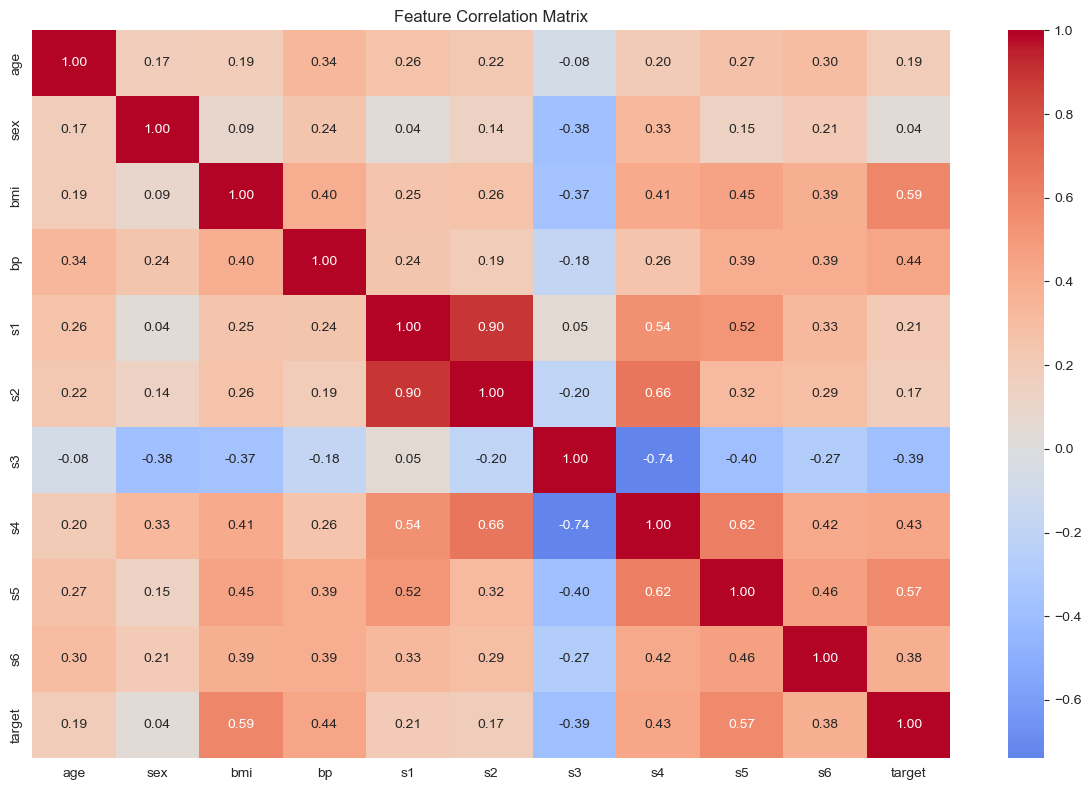


Correlation with Target (disease progression):
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


In [10]:
# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation with target
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("\nCorrelation with Target (disease progression):")
print(target_corr)

### 3.2 Train Linear Regression Model

In [11]:
# Split data
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Train model
model_diabetes = LinearRegression()
model_diabetes.fit(X_train_db, y_train_db)

# Predictions
y_train_pred_db = model_diabetes.predict(X_train_db)
y_test_pred_db = model_diabetes.predict(X_test_db)

# Evaluate
print("Diabetes Model Performance")
print("="*70)
print(f"\nTraining Set:")
print(f"  R² Score: {r2_score(y_train_db, y_train_pred_db):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_db, y_train_pred_db)):.2f}")
print(f"  MAE: {mean_absolute_error(y_train_db, y_train_pred_db):.2f}")

print(f"\nTest Set:")
print(f"  R² Score: {r2_score(y_test_db, y_test_pred_db):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_db, y_test_pred_db)):.2f}")
print(f"  MAE: {mean_absolute_error(y_test_db, y_test_pred_db):.2f}")

# Cross-validation
cv_scores = cross_val_score(model_diabetes, X_diabetes, y_diabetes, cv=5, scoring='r2')
print(f"\nCross-Validation (5-fold):")
print(f"  R² Scores: {[f'{s:.3f}' for s in cv_scores]}")
print(f"  Mean R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Diabetes Model Performance

Training Set:
  R² Score: 0.5279
  RMSE: 53.56
  MAE: 43.48

Test Set:
  R² Score: 0.4526
  RMSE: 53.85
  MAE: 42.79

Cross-Validation (5-fold):
  R² Scores: ['0.430', '0.523', '0.483', '0.426', '0.550']
  Mean R²: 0.4823 ± 0.0493



Feature Coefficients (sorted by magnitude):
Feature  Coefficient  Abs_Coefficient
     s1  -931.488846       931.488846
     s5   736.198859       736.198859
    bmi   542.428759       542.428759
     s2   518.062277       518.062277
     bp   347.703844       347.703844
     s4   275.317902       275.317902
    sex  -241.964362       241.964362
     s3   163.419983       163.419983
     s6    48.670657        48.670657
    age    37.904021        37.904021


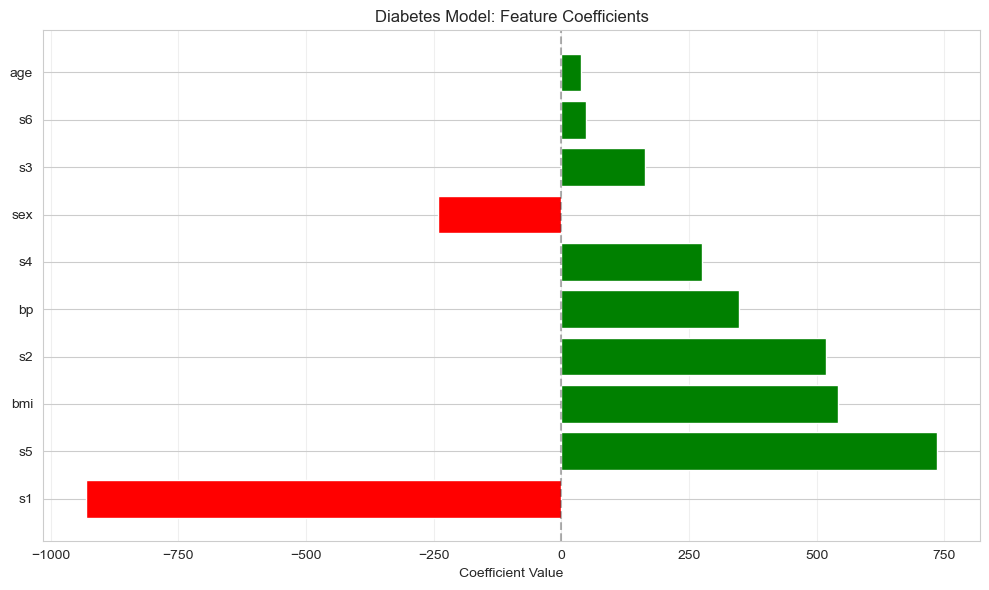


Interpretation:
  Intercept: 151.35
  Most positive effect: s1 (-931.49)
  Most negative effect: age (37.90)


In [12]:
# Analyze coefficients
coef_diabetes = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model_diabetes.coef_,
    'Abs_Coefficient': np.abs(model_diabetes.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by magnitude):")
print(coef_diabetes.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in coef_diabetes['Coefficient']]
plt.barh(coef_diabetes['Feature'], coef_diabetes['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Diabetes Model: Feature Coefficients')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print(f"  Intercept: {model_diabetes.intercept_:.2f}")
print(f"  Most positive effect: {coef_diabetes.iloc[0]['Feature']} ({coef_diabetes.iloc[0]['Coefficient']:.2f})")
print(f"  Most negative effect: {coef_diabetes.iloc[-1]['Feature']} ({coef_diabetes.iloc[-1]['Coefficient']:.2f})")

## 4. Polynomial Regression

### 4.1 Non-linear Relationships

In [13]:
# Generate non-linear data
np.random.seed(42)
X_poly = 6 * np.random.rand(100, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(100, 1).ravel()

print("Polynomial Regression Example")
print("="*70)
print(f"True relationship: y = 0.5*x² + x + 2 + noise")
print(f"Data shape: {X_poly.shape}")

# Try linear regression (will underfit)
model_linear_poly = LinearRegression()
model_linear_poly.fit(X_poly, y_poly)
y_pred_linear = model_linear_poly.predict(X_poly)
r2_linear = r2_score(y_poly, y_pred_linear)

print(f"\nLinear Model R²: {r2_linear:.4f} (underfitting!)")

Polynomial Regression Example
True relationship: y = 0.5*x² + x + 2 + noise
Data shape: (100, 1)

Linear Model R²: 0.6024 (underfitting!)


In [14]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

print("Polynomial Features:")
print(f"  Original features: {X_poly.shape[1]}")
print(f"  Transformed features: {X_poly_transformed.shape[1]}")
print(f"  Feature names: {poly_features.get_feature_names_out(['x'])}")

# Fit polynomial model
model_poly = LinearRegression()
model_poly.fit(X_poly_transformed, y_poly)
y_pred_poly = model_poly.predict(X_poly_transformed)
r2_poly = r2_score(y_poly, y_pred_poly)

print(f"\nPolynomial Model (degree=2):")
print(f"  R²: {r2_poly:.4f}")
print(f"  Coefficients: {model_poly.coef_}")
print(f"  Intercept: {model_poly.intercept_:.4f}")
print(f"\nLearned equation: y = {model_poly.intercept_:.2f} + {model_poly.coef_[0]:.2f}*x + {model_poly.coef_[1]:.2f}*x²")

Polynomial Features:
  Original features: 1
  Transformed features: 2
  Feature names: ['x' 'x^2']

Polynomial Model (degree=2):
  R²: 1.0000
  Coefficients: [[1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  0.5]
 [1.  

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
# Visualize comparison
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

plt.figure(figsize=(12, 5))

# Linear model
plt.subplot(1, 2, 1)
plt.scatter(X_poly, y_poly, alpha=0.6, label='Data')
plt.plot(X_plot, model_linear_poly.predict(X_plot), 'r-', linewidth=2, label='Linear model')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Model (R² = {r2_linear:.3f}) - Underfitting')
plt.legend()
plt.grid(alpha=0.3)

# Polynomial model
plt.subplot(1, 2, 2)
plt.scatter(X_poly, y_poly, alpha=0.6, label='Data')
plt.plot(X_plot, model_poly.predict(X_plot_poly), 'g-', linewidth=2, label='Polynomial model (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Model (R² = {r2_poly:.3f})')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Effect of Polynomial Degree

In [ ]:
# Compare different degrees
degrees = [1, 2, 3, 5, 10]
results = []

for degree in degrees:
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
    X_transformed = poly_feat.fit_transform(X_poly)
    
    model = LinearRegression()
    model.fit(X_transformed, y_poly)
    
    y_pred = model.predict(X_transformed)
    r2 = r2_score(y_poly, y_pred)
    mse = mean_squared_error(y_poly, y_pred)
    
    results.append({
        'Degree': degree,
        'Features': X_transformed.shape[1],
        'R²': r2,
        'MSE': mse
    })

results_df = pd.DataFrame(results)
print("Effect of Polynomial Degree:")
print("="*70)
print(results_df.to_string(index=False))

print("\n💡 Observations:")
print("  - Degree 2: Good fit (matches true relationship)")
print("  - Higher degrees: Risk of overfitting")
print("  - More features ≠ better model!")

## 5. Real Dataset: California Housing

### 5.1 Load and Explore

In [ ]:
# Load California housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print("California Housing Dataset")
print("="*70)
print(f"Samples: {X_housing.shape[0]}")
print(f"Features: {X_housing.shape[1]}")
print(f"Feature names: {housing.feature_names}")
print(f"\nTarget: Median house value (in $100,000s)")
print(f"  Range: ${y_housing.min()*100000:.0f} - ${y_housing.max()*100000:.0f}")
print(f"  Mean: ${y_housing.mean()*100000:.0f}")

# Create DataFrame
df_housing = pd.DataFrame(X_housing, columns=housing.feature_names)
df_housing['Price'] = y_housing

print("\nDataset Statistics:")
print(df_housing.describe())

In [ ]:
# Split and standardize
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_hs_scaled = scaler.fit_transform(X_train_hs)
X_test_hs_scaled = scaler.transform(X_test_hs)

# Train model
model_housing = LinearRegression()
model_housing.fit(X_train_hs_scaled, y_train_hs)

# Predictions
y_train_pred_hs = model_housing.predict(X_train_hs_scaled)
y_test_pred_hs = model_housing.predict(X_test_hs_scaled)

# Evaluate
print("California Housing Model Performance")
print("="*70)
print(f"\nTraining Set:")
print(f"  R²: {r2_score(y_train_hs, y_train_pred_hs):.4f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_train_hs, y_train_pred_hs))*100000:.0f}")
print(f"  MAE: ${mean_absolute_error(y_train_hs, y_train_pred_hs)*100000:.0f}")

print(f"\nTest Set:")
print(f"  R²: {r2_score(y_test_hs, y_test_pred_hs):.4f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test_hs, y_test_pred_hs))*100000:.0f}")
print(f"  MAE: ${mean_absolute_error(y_test_hs, y_test_pred_hs)*100000:.0f}")

In [ ]:
# Feature importance (now properly scaled)
coef_housing = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': model_housing.coef_,
    'Abs_Coefficient': np.abs(model_housing.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (on standardized features):")
print(coef_housing.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in coef_housing['Coefficient']]
plt.barh(coef_housing['Feature'], coef_housing['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Standardized Coefficient')
plt.title('California Housing: Feature Importance')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Interpretation (after standardization):")
print("   Coefficient magnitudes are now comparable!")
print(f"   Most important: {coef_housing.iloc[0]['Feature']}")

## 6. Model Diagnostics and Assumptions

### 6.1 Residual Analysis

In [ ]:
# Calculate residuals
residuals_train = y_train_hs - y_train_pred_hs
residuals_test = y_test_hs - y_test_pred_hs

# Visualize residuals
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_train_pred_hs, residuals_train, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(alpha=0.3)

# 2. Histogram of residuals
axes[0, 1].hist(residuals_train, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')
axes[0, 1].grid(alpha=0.3)

# 3. Q-Q plot
from scipy import stats
stats.probplot(residuals_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(alpha=0.3)

# 4. Scale-Location plot
standardized_residuals = residuals_train / residuals_train.std()
axes[1, 1].scatter(y_train_pred_hs, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('√|Standardized Residuals|')
axes[1, 1].set_title('Scale-Location Plot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Residual Analysis:")
print("="*70)
print(f"Mean of residuals: {residuals_train.mean():.6f} (should be ≈ 0)")
print(f"Std of residuals: {residuals_train.std():.4f}")
print(f"\nWhat to look for:")
print("  1. Residuals vs Fitted: Random scatter (no pattern)")
print("  2. Histogram: Approximately normal distribution")
print("  3. Q-Q Plot: Points follow diagonal line")
print("  4. Scale-Location: Constant variance (homoscedasticity)")

### 6.2 Linear Regression Assumptions

Linear regression relies on several key assumptions:

1. **Linearity**: Relationship between X and y is linear
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of residuals
4. **Normality**: Residuals are normally distributed
5. **No multicollinearity**: Features are not highly correlated

#### Checking Multicollinearity

In [ ]:
# Calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for housing dataset
vif_data = pd.DataFrame()
vif_data["Feature"] = housing.feature_names
vif_data["VIF"] = [variance_inflation_factor(X_train_hs_scaled, i) 
                   for i in range(X_train_hs_scaled.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF):")
print("="*70)
print(vif_data.to_string(index=False))
print("\nInterpretation:")
print("  VIF < 5: Low multicollinearity")
print("  5 < VIF < 10: Moderate multicollinearity")
print("  VIF > 10: High multicollinearity (problematic)")

high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n⚠ Warning: {len(high_vif)} feature(s) with VIF > 10")
else:
    print("\n✓ No severe multicollinearity detected")

## Summary and Best Practices

### Key Concepts

```python
# Basic usage
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Get parameters
intercept = model.intercept_
coefficients = model.coef_
```

### When to Use Linear Regression

✓ **Good for:**
- Continuous target variable
- Linear or polynomial relationships
- Interpretable models
- Baseline models
- Small to medium datasets

✗ **Not ideal for:**
- Highly non-linear relationships
- Classification tasks (use logistic regression)
- High-dimensional data without regularization
- When assumptions are violated

### Best Practices

1. **Always standardize features** when comparing coefficient magnitudes
2. **Check assumptions** (linearity, independence, homoscedasticity, normality)
3. **Look for multicollinearity** (VIF > 10 is problematic)
4. **Analyze residuals** to validate model fit
5. **Use polynomial features** for non-linear relationships
6. **Apply regularization** (Ridge/Lasso) for high-dimensional data
7. **Cross-validate** to assess generalization

### Common Metrics

- **R² Score**: Proportion of variance explained (0-1, higher is better)
- **MSE**: Mean squared error (lower is better)
- **RMSE**: Root mean squared error (same units as target)
- **MAE**: Mean absolute error (robust to outliers)

### Next Steps

- Regularization (Ridge, Lasso, ElasticNet) → Next notebook!
- Feature engineering and selection
- Gradient descent optimization
- Advanced regression techniques